In [7]:
library(ggplot2)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


# lncRNA

In [1]:
lncRNA_CNN_word2vec_3mer_CV <- data.frame(list(AUC=c(0.647145, 0.6383602, 0.67155427, 0.6392962, 0.6451613),model="CNN_word2vec_3mer"))
lncRNA_CNN_word2vec_4mer_CV <- data.frame(list(AUC=c(0.6222547, 0.6061493, 0.6392962, 0.6260997, 0.6143695),model="CNN_word2vec_4mer"))
lncRNA_CNN_word2vec_5mer_CV <- data.frame(list(AUC=c(0.647145, 0.670571, 0.670088, 0.62903225, 0.65102637),model="CNN_word2vec_5mer"))

lncRNA_CNN_one_hot_CV <- data.frame(list(AUC=c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648),model="CNN_one_hot"))
lncRNA_RNAlight_CV <- data.frame(list(AUC=c(0.7472711645896004,0.7320756338633434,0.7481291813228499,0.7629146837712946,0.7429391682184978
),model="RNAlight"))

In [5]:
t.test(c(0.647145, 0.6383602, 0.67155427, 0.6392962, 0.6451613),c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648))


	Welch Two Sample t-test

data:  c(0.647145, 0.6383602, 0.67155427, 0.6392962, 0.6451613) and c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648)
t = 1.3026, df = 5.2825, p-value = 0.2466
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.008011026  0.025018138
sample estimates:
mean of x mean of y 
0.6483034 0.6397998 


In [12]:
t.test(c(0.6222547, 0.6061493, 0.6392962, 0.6260997, 0.6143695),c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648))


	Welch Two Sample t-test

data:  c(0.6222547, 0.6061493, 0.6392962, 0.6260997, 0.6143695) and c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648)
t = -2.9758, df = 5.4875, p-value = 0.0276
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.033448234 -0.002883682
sample estimates:
mean of x mean of y 
0.6216339 0.6397998 


In [7]:
t.test(c(0.647145, 0.670571, 0.670088, 0.62903225, 0.65102637),c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648))


	Welch Two Sample t-test

data:  c(0.647145, 0.670571, 0.670088, 0.62903225, 0.65102637) and c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648)
t = 1.6875, df = 4.7878, p-value = 0.1549
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.007490173  0.035035545
sample estimates:
mean of x mean of y 
0.6535725 0.6397998 


In [2]:
lncRNA_CV_df <- rbind(lncRNA_RNAlight_CV,lncRNA_CNN_one_hot_CV ,lncRNA_CNN_word2vec_3mer_CV ,lncRNA_CNN_word2vec_4mer_CV,lncRNA_CNN_word2vec_5mer_CV)
lncRNA_CV_df$model <- factor(lncRNA_CV_df$model,levels=c("RNAlight","CNN_one_hot","CNN_word2vec_3mer","CNN_word2vec_4mer","CNN_word2vec_5mer"))

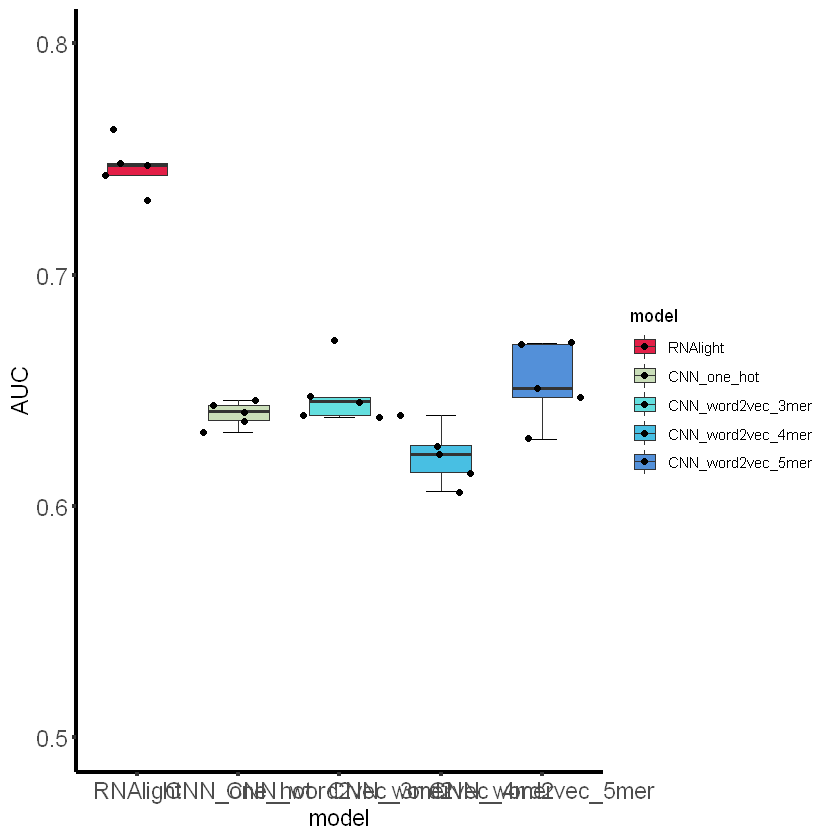

In [10]:
p_box <- ggplot(lncRNA_CV_df,aes(x=model,y=AUC,fill = model))+
stat_boxplot(geom = "errorbar",width=0.3,position = position_dodge(0.7))+
geom_boxplot(width = 0.6,outlier.color="white",position = position_dodge(0.7))+
geom_jitter()+
ylim(0.5,0.8)+theme_classic()+
scale_fill_manual(values=c("#E31F47","#CADEB9","#64dfdf","#48bfe3","#5390d9"))+
theme(axis.text = element_text(size=14),
axis.title = element_text(size=14),
element_line(size = 1.2))

ggsave("./RNAlight_lncRNA_CV_Result_word2vec_with_text.tiff", p_box, width = 10, height = 10)
p_box

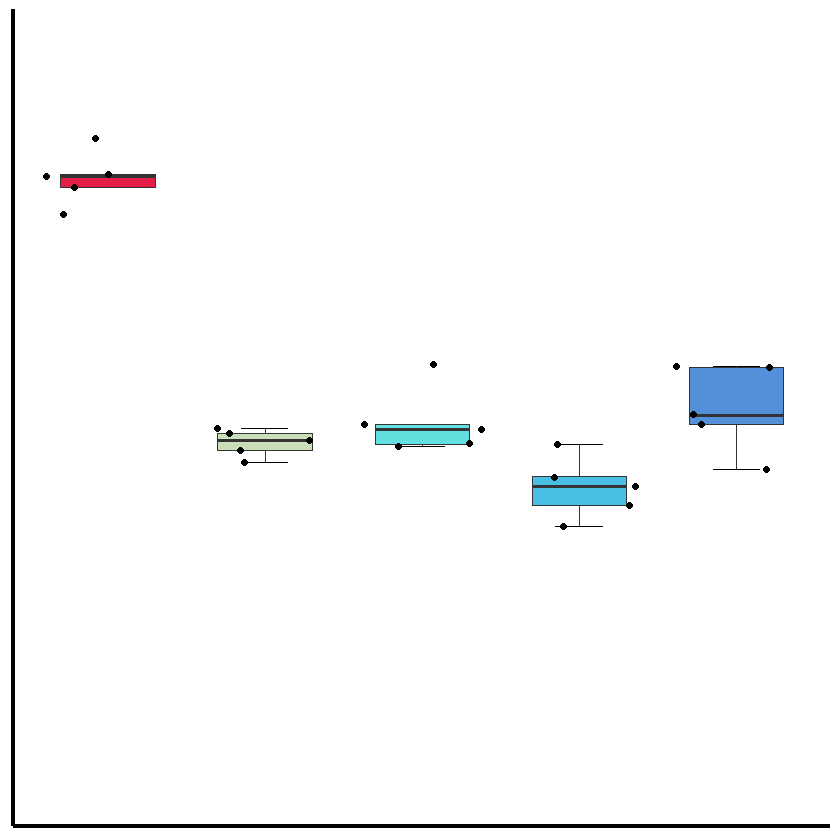

In [11]:
p_box2 <- p_box + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_lncRNA_CV_Result_word2vec.tiff", p_box2, width = 10, height = 10)
p_box2

In [17]:
lncRNA_TestSet_AUC_df <- data.frame(list(AUC=c(0.7833019077196096,0.718029059449867,0.7239629547471162,0.6017912599822537,0.6991182342502218),model=c("RNAlight","CNN_one_hot","CNN_word2vec_3mer","CNN_word2vec_4mer","CNN_word2vec_5mer")))
lncRNA_TestSet_AUC_df$model <-  factor(lncRNA_TestSet_AUC_df$model,levels=c("RNAlight","CNN_one_hot","CNN_word2vec_3mer","CNN_word2vec_4mer","CNN_word2vec_5mer"))

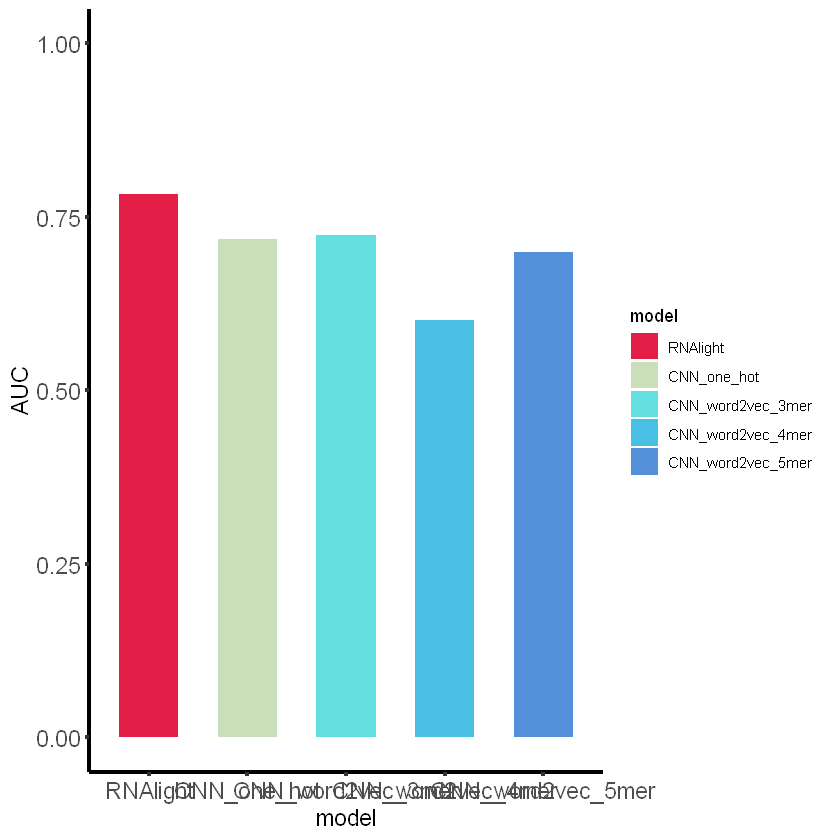

In [19]:
p_auc_RNALight_bar <- ggplot(lncRNA_TestSet_AUC_df  ,aes(x=model,y=AUC,fill = model))+
geom_bar(stat="identity",position=position_dodge(0.7),width=0.6)+
ylim(0,1) +
theme_classic()+
scale_fill_manual(values=c("#E31F47","#CADEB9","#64dfdf","#48bfe3","#5390d9"))+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
element_line(size = 1.2))
ggsave("./RNAlight_lncRNA_bar_word2vec_with_text.tiff",p_auc_RNALight_bar, width = 10, height = 10) 
p_auc_RNALight_bar 

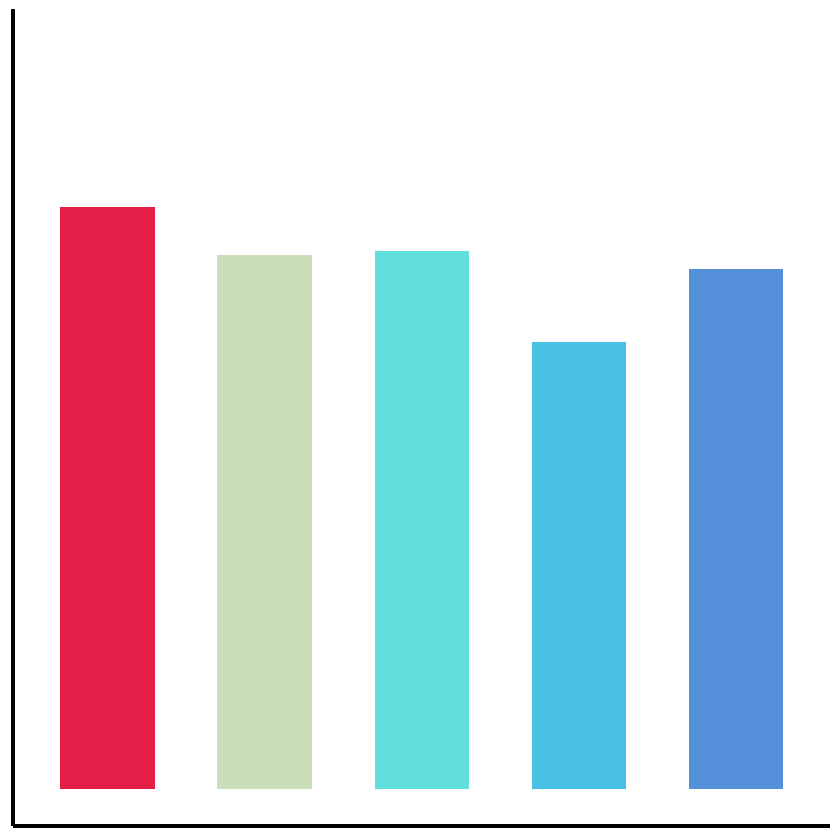

In [20]:
p_auc_RNALight_bar2 <-p_auc_RNALight_bar  + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_lncRNA_bar_word2vec.tiff",p_auc_RNALight_bar2 , width = 10, height = 10)
p_auc_RNALight_bar2 

In [4]:
# Time consumption

lncRNA_time_mem_df <- data.frame(list(time=c(47,375,398,425),
                                      memory=c(1885,17501,17501,17501),model=c("CNN_one_hot","CNN_word2vec_3mer","CNN_word2vec_4mer","CNN_word2vec_5mer")))
lncRNA_time_mem_df$model <-  factor(lncRNA_time_mem_df$model,levels=c("CNN_one_hot","CNN_word2vec_3mer","CNN_word2vec_4mer","CNN_word2vec_5mer"))
lncRNA_time_mem_df$norm_time <- lncRNA_time_mem_df$time / 47
lncRNA_time_mem_df$norm_mem <- lncRNA_time_mem_df$memory / 1885

In [33]:
 lnc_consump_df <- data.frame(list(Relative_consump = c(lncRNA_time_mem_df$norm_time,lncRNA_time_mem_df$norm_mem),
                                   obj = c(rep("time",4),rep("mem",4)),
                                   model=rep(c("CNN_one_hot","CNN_word2vec_3mer","CNN_word2vec_4mer","CNN_word2vec_5mer"),2)))

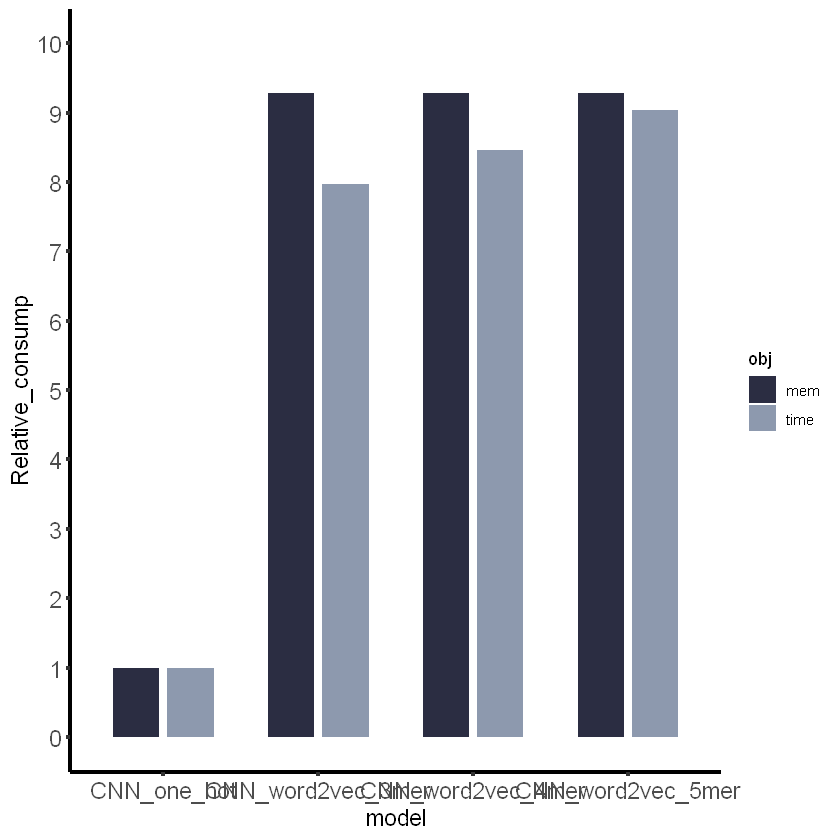

In [35]:
p_consump_RNALight_bar <- ggplot(lnc_consump_df,aes(x=model,y=Relative_consump,fill = obj ))+
geom_bar(stat="identity",position=position_dodge(0.7),width=0.6)+
theme_classic()+
scale_y_continuous(limits=c(0,10),breaks=c(0,1,2,3,4,5,6,7,8,9,10))+
scale_fill_manual(values=c("#2b2d42","#8d99ae"))+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
element_line(size = 1.2))
ggsave("./RNAlight_lncRNA_consump_bar_word2vec_with_text.tiff",p_consump_RNALight_bar, width = 10, height = 10) 
p_consump_RNALight_bar

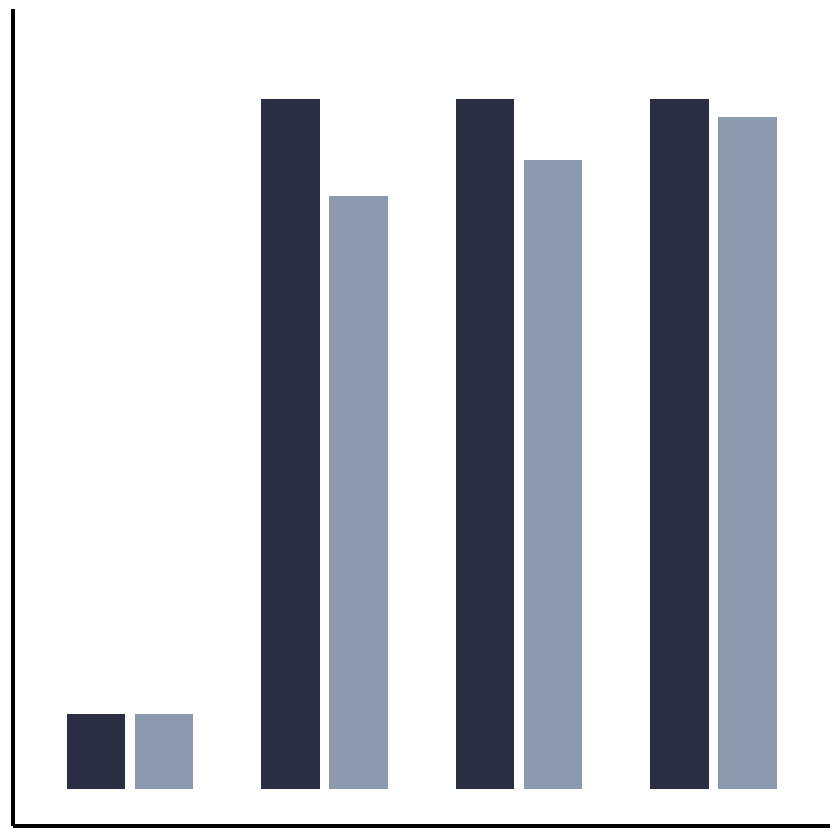

In [36]:
p_consump_RNALight_bar2 <-p_consump_RNALight_bar  + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_lncRNA_consump_bar_word2vec.tiff",p_consump_RNALight_bar2 , width = 10, height = 10)
p_consump_RNALight_bar2 

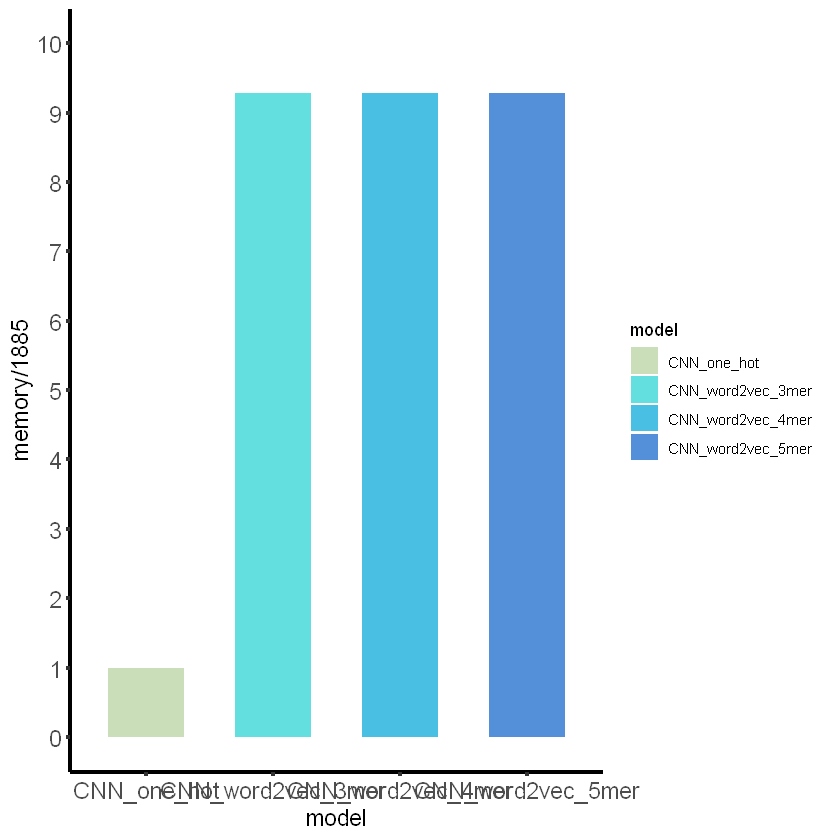

In [19]:
p_mem_RNALight_bar <- ggplot(lncRNA_time_mem_df  ,aes(x=model,y=memory/1885,fill = model))+
geom_bar(stat="identity",position=position_dodge(0.7),width=0.6)+
theme_classic()+
scale_y_continuous(limits=c(0,10),breaks=c(0,1,2,3,4,5,6,7,8,9,10))+
scale_fill_manual(values=c("#CADEB9","#64dfdf","#48bfe3","#5390d9"))+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
element_line(size = 1.2))
ggsave("./RNAlight_lncRNA_mem_bar_word2vec_with_text.tiff",p_mem_RNALight_bar, width = 10, height = 10) 
p_mem_RNALight_bar

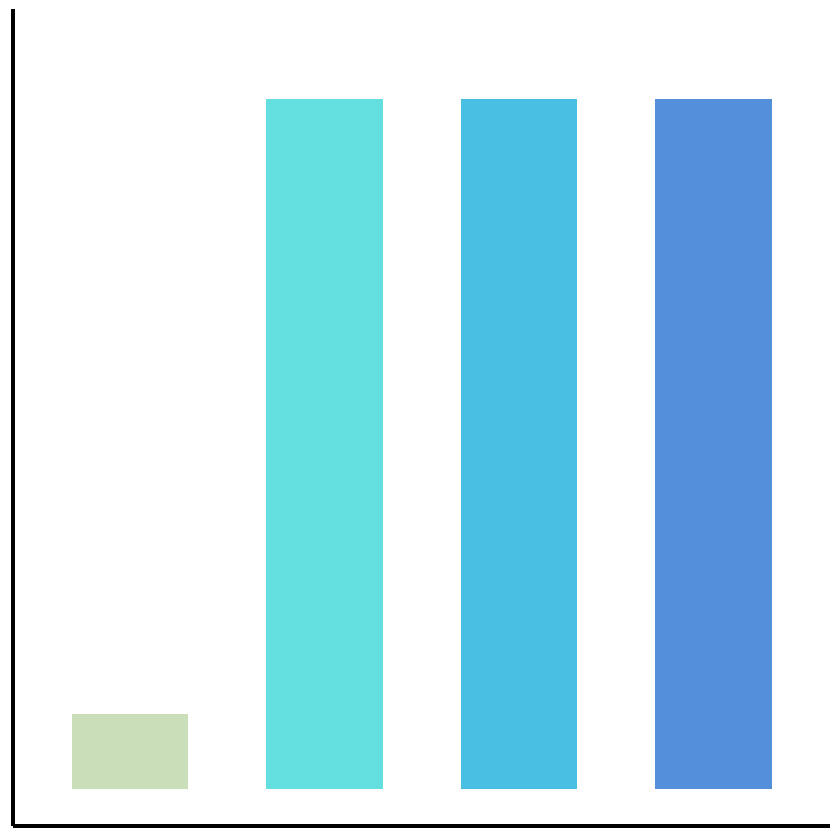

In [20]:
p_mem_RNALight_bar2 <-p_mem_RNALight_bar  + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_lncRNA_mem_bar_word2vec.tiff",p_mem_RNALight_bar2 , width = 10, height = 10)
p_mem_RNALight_bar2 

In [ ]:
#mRNA

In [ ]:
	auroc_on_CV
5	[0.659164, 0.65166134, 0.6416309, 0.666309, 0.7027897]

In [13]:
mRNA_CNN_word2vec_3mer_CV <- data.frame(list(AUC=c(0.659164, 0.65166134, 0.6416309, 0.666309, 0.7027897),model="CNN_word2vec_3mer"))
mRNA_CNN_word2vec_4mer_CV <- data.frame(list(AUC=c(0.6602358, 0.6452304, 0.63733906, 0.6834764, 0.6577253),model="CNN_word2vec_4mer"))
mRNA_CNN_word2vec_5mer_CV <- data.frame(list(AUC=c(0.65380496, 0.6430868, 0.67060083, 0.6351931, 0.68562233),model="CNN_word2vec_5mer"))

mRNA_CNN_one_hot_CV <- data.frame(list(AUC=c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468),model="CNN_one_hot"))
mRNA_RNAlight_CV <- data.frame(list(AUC=c(0.7573167197913648,0.7700479524401529,0.746384872080089,0.7548293391430646,0.7553490118762615),model="RNAlight"))

In [14]:
t.test(c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468),c(0.659164, 0.65166134, 0.6416309, 0.666309, 0.7027897))


	Welch Two Sample t-test

data:  c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468) and c(0.659164, 0.65166134, 0.6416309, 0.666309, 0.7027897)
t = 0.75769, df = 5.7568, p-value = 0.4785
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01988786  0.03746603
sample estimates:
mean of x mean of y 
0.6731001 0.6643110 


In [15]:
t.test(c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468),c(0.6602358, 0.6452304, 0.63733906, 0.6834764, 0.6577253))


	Welch Two Sample t-test

data:  c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468) and c(0.6602358, 0.6452304, 0.63733906, 0.6834764, 0.6577253)
t = 1.7462, df = 6.802, p-value = 0.1255
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.005903727  0.038501091
sample estimates:
mean of x mean of y 
0.6731001 0.6568014 


In [16]:
t.test(c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468),c(0.65380496, 0.6430868, 0.67060083, 0.6351931, 0.68562233))


	Welch Two Sample t-test

data:  c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468) and c(0.65380496, 0.6430868, 0.67060083, 0.6351931, 0.68562233)
t = 1.4764, df = 6.2062, p-value = 0.1887
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.009944165  0.040821105
sample estimates:
mean of x mean of y 
0.6731001 0.6576616 


In [17]:
mRNA_CV_df <- rbind(mRNA_RNAlight_CV,mRNA_CNN_one_hot_CV ,mRNA_CNN_word2vec_3mer_CV ,mRNA_CNN_word2vec_4mer_CV,mRNA_CNN_word2vec_5mer_CV)
mRNA_CV_df$model <- factor(mRNA_CV_df$model,levels=c("RNAlight","CNN_one_hot","CNN_word2vec_3mer","CNN_word2vec_4mer","CNN_word2vec_5mer"))

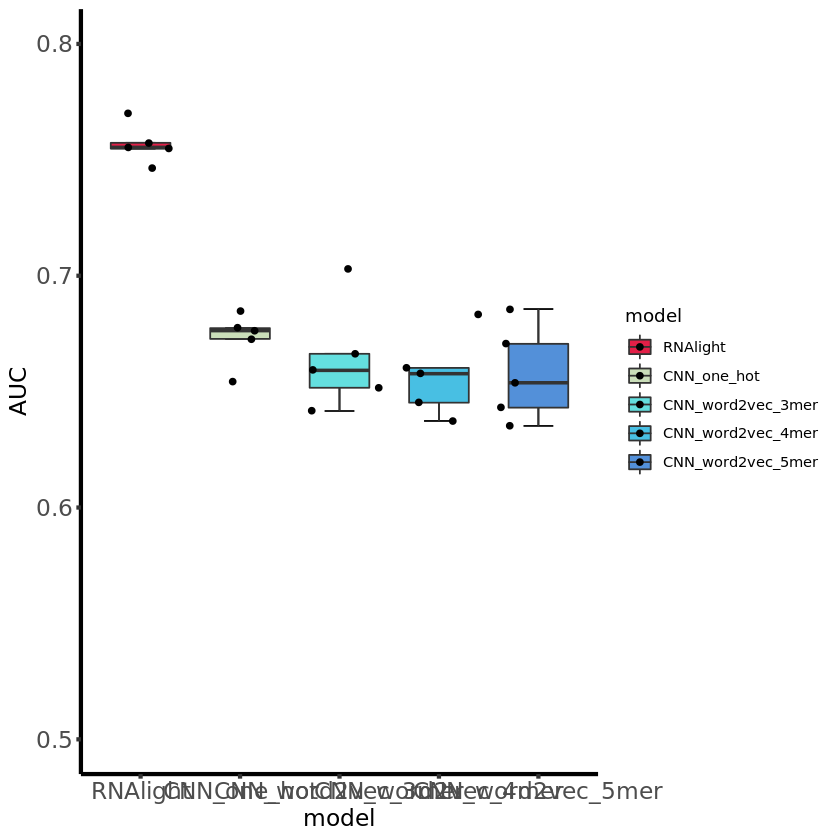

In [18]:
p_box <- ggplot(mRNA_CV_df,aes(x=model,y=AUC,fill = model))+
stat_boxplot(geom = "errorbar",width=0.3,position = position_dodge(0.7))+
geom_boxplot(width = 0.6,outlier.color="white",position = position_dodge(0.7))+
geom_jitter()+
ylim(0.5,0.8)+theme_classic()+
scale_fill_manual(values=c("#E31F47","#CADEB9","#64dfdf","#48bfe3","#5390d9"))+
theme(axis.text = element_text(size=14),
axis.title = element_text(size=14),
element_line(size = 1.2))

ggsave("./RNAlight_mRNA_CV_Result_word2vec_with_text.tiff", p_box, width = 10, height = 10)
p_box

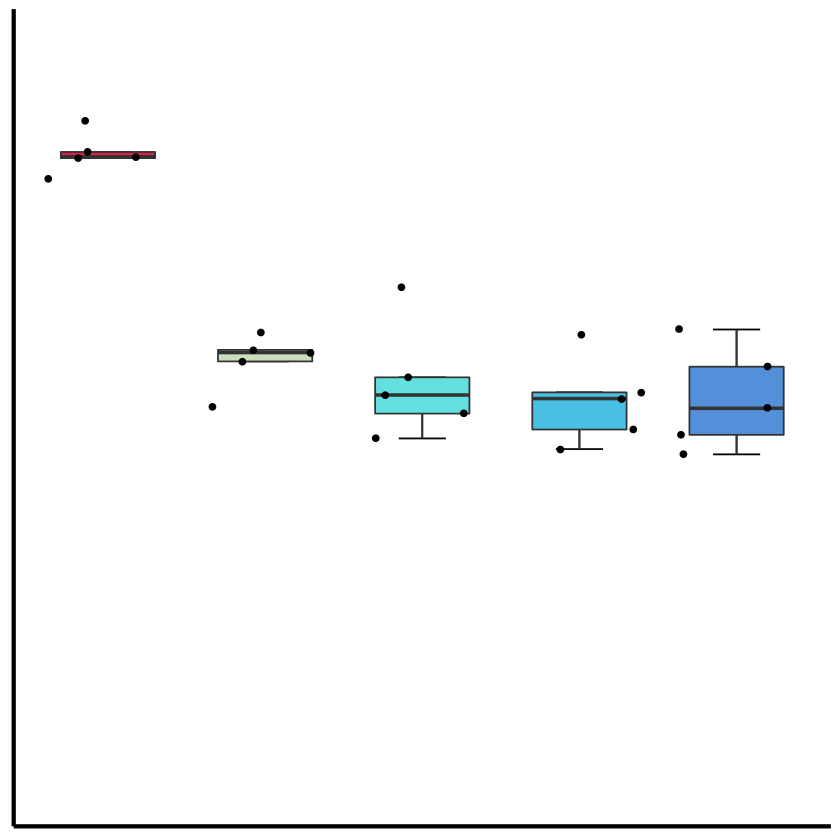

In [20]:
p_box2 <- p_box + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_mRNA_CV_Result_word2vec.tiff", p_box2, width = 10, height = 10)
p_box2

In [21]:
mRNA_TestSet_AUC_df <- data.frame(list(AUC=c(0.7984119782214156,0.7086963097398669,0.7116001209921355,0.7091954022988506,0.6813974591651543),model=c("RNAlight","CNN_one_hot","CNN_word2vec_3mer","CNN_word2vec_4mer","CNN_word2vec_5mer")))
mRNA_TestSet_AUC_df$model <-  factor(mRNA_TestSet_AUC_df$model,levels=c("RNAlight","CNN_one_hot","CNN_word2vec_3mer","CNN_word2vec_4mer","CNN_word2vec_5mer"))

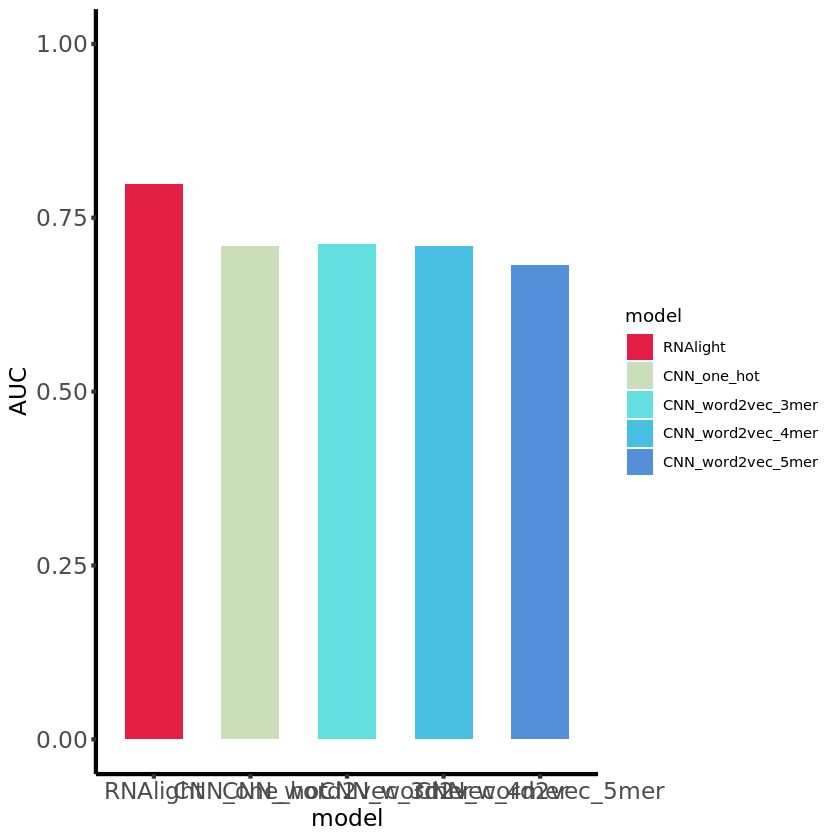

In [23]:
p_auc_RNALight_bar <- ggplot(mRNA_TestSet_AUC_df  ,aes(x=model,y=AUC,fill = model))+
geom_bar(stat="identity",position=position_dodge(0.7),width=0.6)+
ylim(0,1) +
theme_classic()+
scale_fill_manual(values=c("#E31F47","#CADEB9","#64dfdf","#48bfe3","#5390d9"))+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
element_line(size = 1.2))
ggsave("./RNAlight_mRNA_bar_word2vec_with_text.tiff",p_auc_RNALight_bar, width = 10, height = 10) 
p_auc_RNALight_bar 

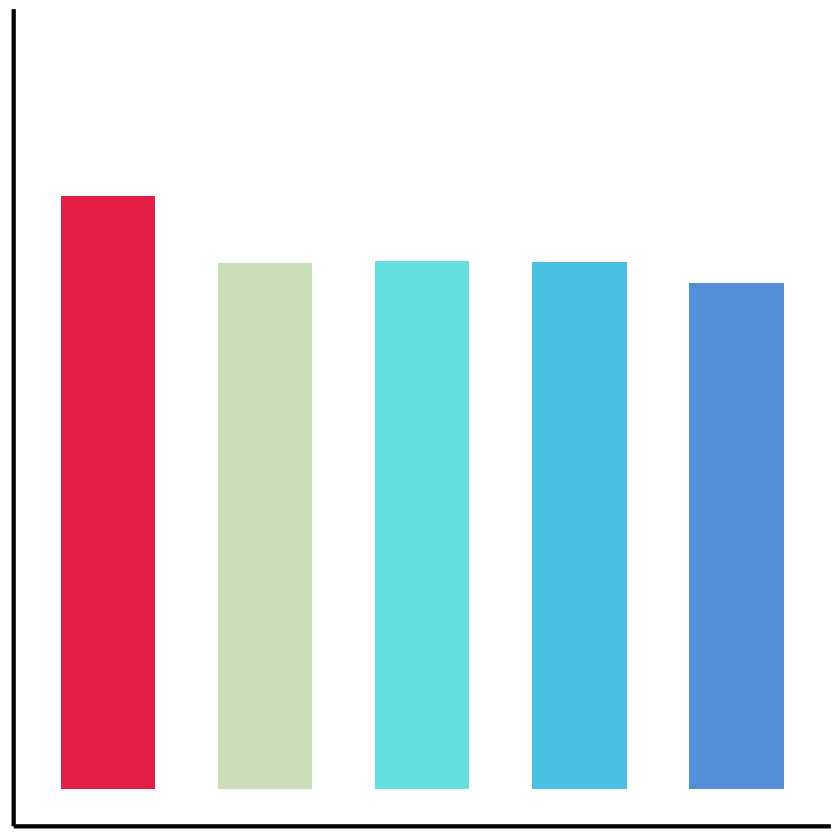

In [24]:
p_auc_RNALight_bar2 <-p_auc_RNALight_bar  + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_mRNA_bar_word2vec.tiff",p_auc_RNALight_bar2 , width = 10, height = 10)
p_auc_RNALight_bar2 